# Importation des données

In [73]:
import os
import string
import re
import math
from math import sqrt
import numpy as np
import random
import time
import pandas as pd
import nltk, re, pprint
#nltk.download('punkt')
from nltk import word_tokenize
random.seed(1)
np.random.seed(1)

import matplotlib.pyplot as plt
from IPython.display import clear_output
from matplotlib import pyplot as plt
import collections
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.autograd as autograd

import pickle

#PCA & TSNE : 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.stats import spearmanr

import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import seaborn as sns

In [74]:
nom_dossier = "100k"
#nom_dossier = "ens" #ou

#os.chdir('C:/Users/torna/Documents/StatApp/StatApp')
os.chdir('/Users/alainquartierlatente/Desktop/Ensae/StatApp')
#os.chdir('C:/Users/Kim Antunez/Documents/Projets_autres/StatApp')
#os.chdir('/home/aqlt/Documents/Ensae/StatApp')


with open("data/corpus_trie%s.file" %nom_dossier, "rb") as f:
    corpus = pickle.load(f) 
ens_tweets = [phrase.split() for phrase in corpus]
len(ens_tweets)

99718

On crée index_mot et mot_index

In [75]:
phrases = ens_tweets
words = [item for sublist in phrases for item in sublist]
print(type(words))
with open('data/%s/vocabulary.file' %nom_dossier, "rb") as f:
    vocabulary = pickle.load(f) 
index_mot = {index: w for (index, w) in enumerate(vocabulary)}
mot_index = {w: index for (index, w) in enumerate(vocabulary)}
print("Nombre de mots :", len(words))
print("Taille du vocabulaire :", len(vocabulary))
fdist = nltk.FreqDist(words)

<class 'list'>
Nombre de mots : 1127347
Taille du vocabulaire : 10960


Paramètres à modifier 

On renseigne ici le numero de la simulation, cf <https://github.com/AQLT/StatApp/blob/master/Code/Parametres%20lances.md>

In [76]:
numero_simulation = 4
derniere_epoch = 1
seed = 1

In [139]:
with open('data/%s/Simulation_%i_seed%i/input_%i.file' %(nom_dossier, numero_simulation, seed, derniere_epoch) , "rb") as f:
    input = pickle.load(f)
with open('data/%s/Simulation_%i_seed%i/output_%i.file' %(nom_dossier, numero_simulation, seed, derniere_epoch), "rb") as f:
    output = pickle.load(f)
mat_finale = (input+output)/2
mot_poids = {index_mot[index]: poids.detach().numpy() for (index, poids) in enumerate(mat_finale)}

# 1. Distances

Pour tester la similarité entre deux mots, on calcule la **similarité cosinus** entre leur représentation vectorielle :
$$
\frac{A \cdot B}{|| A || \cdot || B ||}
$$

On peut également calculer la **distance euclidienne** pour comparer les résultats avec ces deux métriques

In [77]:
def cos_distance(u, v):
    return (np.dot(u, v)  / (math.sqrt(np.dot(u, u)) *  (math.sqrt(np.dot(v, v)))))

def eucl_distance(u, v):
    return (np.linalg.norm(u-v))

def mot_plus_proche(word, n=10, distance="cos"):
    word_distance = {}
    for mot in mot_poids:
        if mot != word:
            if distance == "cos":
                word_distance[mot] = (cos_distance(mot_poids[mot],(mot_poids[word])))
            else:
                word_distance[mot] = (eucl_distance(mot_poids[mot],(mot_poids[word])))
    word_distance = sorted(word_distance.items(), key=lambda t: t[1],reverse=True)
    return word_distance[0:n]

print(fdist.most_common(100))

[('nickname', 89694), ('lowfrequencyword', 66423), ('de', 39312), ('le', 25066), ('est', 20926), ('je', 20215), ('les', 18382), ('c', 17566), ('j', 17252), ('la', 16791), ('à', 16484), ('pas', 16183), ('que', 12219), ('en', 12111), ('un', 11109), ('et', 10640), ('a', 10056), ('ça', 9730), ('ai', 9054), ('l', 8607), ('mais', 8261), ('il', 8238), ('pour', 7845), ('tu', 7399), ('d', 7333), ('on', 7000), ('une', 6829), ('😂', 6829), ('me', 6183), ('qui', 5452), ('ce', 5403), ('t', 5233), ('😭', 5064), ('dans', 4904), ('plus', 4861), ('sur', 4809), ('mon', 4499), ('moi', 4444), ('suis', 4422), ('qu', 4334), ('y', 4143), ('avec', 3948), ('fait', 3942), ('bien', 3884), ('vous', 3801), ('trop', 3793), ('ma', 3637), ('si', 3608), ('tout', 3286), ('m', 3206), ('elle', 3180), ('va', 3149), ('faire', 3054), ('même', 3032), ('merci', 2786), ('toi', 2757), ('ne', 2748), ('bon', 2691), ('quand', 2678), ('mdr', 2578), ('oui', 2508), ('ils', 2481), ('comme', 2456), ('non', 2446), ('n', 2438), ('se', 2343

In [78]:
mots = ["tweet", "bonjour", "wesh", "gros", "grosse", "femme","romain"]
for mot in mots:
    if mot in mot_index:
        print('Pour le mot "%s"' %mot + " (%i apparitions), les mots les plus proches sont : " %fdist[mot])
        print('cosinus :',mot_plus_proche(mot,distance = "cos"))
        print('euclidienne :',mot_plus_proche(mot,distance = "eucl"))
        print("\n")

Pour le mot "tweet" (443 apparitions), les mots les plus proches sont : 
cosinus : [('dit', 0.7407281762159872), ('par', 0.7389551521821568), ('lui', 0.6918828235874255), ('ses', 0.6912447994409128), ('prend', 0.6858992620072611), ('même', 0.6809190190018156), ('passe', 0.6725295143996586), ('temps', 0.6690630191798882), ('jour', 0.663891924405545), ('hein', 0.6625017964725866)]
euclidienne : [('xptdrrr', 5.251243), ('vieillir', 4.8309493), ('laime', 4.78343), ('rétablir', 4.766369), ('poisse', 4.7456083), ('nv', 4.59645), ('aimait', 4.5895658), ('pardonné', 4.5849323), ('bouches', 4.5549765), ('pénis', 4.5416183)]


Pour le mot "bonjour" (619 apparitions), les mots les plus proches sont : 
cosinus : [('meme', 0.7493898882540221), ('😊', 0.7267995270624884), ('bon', 0.7188311324742304), ('demain', 0.7175019938218483), ('toi', 0.7083228037411458), ('😘', 0.6981526562311159), ('mon', 0.6700835043772805), ('remontée', 0.6591830010703776), ('baffes', 0.6542759790672673), ('toutes', 0.6538339

# 2. Evaluation par le "human judgement"

In [79]:
def distance_mots(word1,word2, mot_poids, distance="cos"):
    if word1 in mot_poids.keys() and word2 in mot_poids.keys():
        if(distance=="cos"):
            word_distance = (cos_distance(mot_poids[word1],(mot_poids[word2])))
        else:
            word_distance = (eucl_distance(mot_poids[word1],(mot_poids[word2])))
    else:
        word_distance = float('nan')
    return word_distance
distance_mots_v = np.vectorize(distance_mots)

In [211]:
def corr_dossier(dossier = "", epoch_max = 50, distance="cos", numero_simulation = 3):
    all_cor = []
    all_p_val = []
    isdir = os.path.isdir('data/%s/Simulation_%i%s/' %(nom_dossier, numero_simulation, dossier))
    if isdir:
        for i in range(epoch_max):
            try:
                with open('data/%s/Simulation_%i%s/input_%i.file' %(nom_dossier, numero_simulation, dossier, i+1), "rb") as f:
                    input = pickle.load(f)
                with open('data/%s/Simulation_%i%s/output_%i.file' %(nom_dossier, numero_simulation, dossier, i+1), "rb") as f:
                    output = pickle.load(f)
                mat_finale = (input+output)/2
                mot_poids = {index_mot[index]: poids.detach().numpy() for (index, poids) in enumerate(mat_finale)}
                df = pd.read_csv('data_bis/word_similarity.csv', sep=";")
                df["corr_word2vec"] = distance_mots_v(df["word1"],df["word2"], mot_poids, distance)
                df = df.dropna()
                corr, p_value = spearmanr(df["corr"], df["corr_word2vec"])
                all_cor.append(corr)
                all_p_val.append(p_value)
            except OSError:
                break;     
        
    return([all_cor, all_p_val]);

def tableau_corr_hji(dossiers, distance="cos", numero_simulation = 3):
    resultats = []
    for dossier in dossiers:
        resultats.append(corr_dossier(dossier,distance = distance, numero_simulation = numero_simulation))

    max_len = max([len(x[0]) for x in resultats])
    for i in range(len(resultats)):
        if(len(resultats[i][0])<max_len):
            resultats[i][0] = resultats[i][0] +[np.nan]*(max_len - len(resultats[i][0]))
            resultats[i][1] = resultats[i][1] +[np.nan]*(max_len - len(resultats[i][1]))
    nom_lignes = [re.sub('_seed', 'Seed ', d) if d != "" else "Pas de seed" for d in dossiers ]
    all_cor = [elem[0] for elem in resultats]
    all_cor = pd.DataFrame(np.array(all_cor),
                       columns=["Epoch %i" %int(i+1) for i in range(len(all_cor[0]))],
                      index = nom_lignes)
    all_p_val = [elem[1] for elem in resultats]
    all_p_val = pd.DataFrame(np.array(all_p_val),
                       columns=["Epoch %i" %int(i+1) for i in range(len(all_p_val[0]))],
                      index = nom_lignes)
    return([all_cor, all_p_val])



dossiers = ["", "_seed1", "_seed5", "_seed10", "_seed15", "_seed20", "_seed25"]

resultats_hji_cos = tableau_corr_hji(dossiers, distance = "cos", numero_simulation = 4)
all_cor_cos = resultats_hji_cos[0]
all_p_val_cos = resultats_hji_cos[1]
all_cor_export_cos = round(all_cor_cos, 3).dropna()
print(all_cor_export_cos)


resultats_hji_eucl = tableau_corr_hji(dossiers, distance = "eucl", numero_simulation = 4)
all_cor_eucl = resultats_hji_eucl[0]
all_p_val_eucl = resultats_hji_eucl[1]
all_cor_export_eucl = round(all_cor_eucl, 3).dropna()
print(all_cor_export_eucl)

         Epoch 1  Epoch 2  Epoch 3  Epoch 4  Epoch 5  Epoch 6  Epoch 7  \
Seed 1     0.280    0.297    0.231    0.203    0.242    0.220    0.214   
Seed 5     0.621    0.621    0.599    0.626    0.604    0.637    0.615   
Seed 10    0.082    0.082    0.115    0.115    0.115    0.115    0.115   
Seed 15    0.560    0.610    0.610    0.637    0.643    0.566    0.516   
Seed 20    0.582    0.538    0.538    0.489    0.522    0.484    0.473   

         Epoch 8  Epoch 9  Epoch 10  
Seed 1     0.176    0.115     0.148  
Seed 5     0.637    0.615     0.626  
Seed 10    0.110    0.115     0.143  
Seed 15    0.555    0.588     0.555  
Seed 20    0.484    0.516     0.445  
         Epoch 1  Epoch 2  Epoch 3  Epoch 4  Epoch 5  Epoch 6  Epoch 7  \
Seed 1     0.044    0.022   -0.022   -0.016   -0.093   -0.077   -0.099   
Seed 5    -0.319   -0.412   -0.429   -0.412   -0.423   -0.423   -0.434   
Seed 10   -0.077   -0.258   -0.357   -0.357   -0.341   -0.379   -0.401   
Seed 15   -0.593   -0.637   -0.

In [212]:
##Il faut installer pandas 1.0 et tabulate
print(all_cor_export_cos.to_markdown())
print("\nDistance euclidienne :\n")
print(all_cor_export_eucl.to_markdown())

|         |   Epoch 1 |   Epoch 2 |   Epoch 3 |   Epoch 4 |   Epoch 5 |   Epoch 6 |   Epoch 7 |   Epoch 8 |   Epoch 9 |   Epoch 10 |
|:--------|----------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|-----------:|
| Seed 1  |     0.28  |     0.297 |     0.231 |     0.203 |     0.242 |     0.22  |     0.214 |     0.176 |     0.115 |      0.148 |
| Seed 5  |     0.621 |     0.621 |     0.599 |     0.626 |     0.604 |     0.637 |     0.615 |     0.637 |     0.615 |      0.626 |
| Seed 10 |     0.082 |     0.082 |     0.115 |     0.115 |     0.115 |     0.115 |     0.115 |     0.11  |     0.115 |      0.143 |
| Seed 15 |     0.56  |     0.61  |     0.61  |     0.637 |     0.643 |     0.566 |     0.516 |     0.555 |     0.588 |      0.555 |
| Seed 20 |     0.582 |     0.538 |     0.538 |     0.489 |     0.522 |     0.484 |     0.473 |     0.484 |     0.516 |      0.445 |

Distance euclidienne :

|         |   Epoch 1 |   Epoch 2 |   Epoch 

In [145]:
df_base = pd.read_csv('data_bis/word_similarity.csv', sep=";")
df_base

,word1,word2,corr
0,corde,sourire,0.00
1,midi,ficelle,0.00
2,coq,périple,0.06
3,fruit,fournaise,0.11
4,autographe,rivage,0.00
...,...,...,...
60,coussin,oreiller,3.00
61,cimetière,cimetière,4.00
62,automobile,auto,3.94
63,joyau,bijou,3.22


In [146]:
distance_mots_v = np.vectorize(distance_mots)
df = df_base
df["corr_word2vec_cos"] = distance_mots_v(df["word1"],df["word2"], mot_poids, "cos")
df["corr_word2vec_eucl"] = distance_mots_v(df["word1"],df["word2"], mot_poids, "eucl")
print(len(df))
df = df.dropna()
print(len(df))
df

65
13


,word1,word2,corr,corr_word2vec_cos,corr_word2vec_eucl
0,corde,sourire,0.00,-0.194907,4.206619
16,côte,forêt,0.22,-0.269986,3.997401
20,garçon,sage,0.29,-0.182006,4.599676
23,gars,sorcier,0.44,-0.111060,3.898438
28,oiseau,bois,0.06,0.372567,3.162694
33,auto,voyage,0.33,-0.270593,4.733108
35,verre,bijou,0.56,-0.114582,4.692769
38,frère,gars,2.00,0.061818,3.598426
39,sage,sorcier,0.83,0.325418,3.112226
43,nourriture,fruit,2.78,-0.243064,5.038276


In [147]:
#On fait des tests à 5 % pour la distance cosinus
alpha = 0.05
corr, p_value = spearmanr(df["corr"], df["corr_word2vec_cos"])
if p_value > alpha:
    print('Le résultat de word2vec COSINUS est différent de celui du human judgement (non rejet de H0 = non corrélation) p=%.3f' % p_value,'/ Valeur de la corrélation : %.3f'% corr)
else:
    print('Le résultat de word2vec COSINUS est semblable celui du human judgement (rejet de H0 = non corrélation) p=%.3f' % p_value,'/ Valeur de la corrélation : %.3f'% corr)

print("\n")

#On fait des tests à 5 % pour la distance euclidienne
alpha = 0.05
corr, p_value = spearmanr(df["corr"], df["corr_word2vec_eucl"])
if p_value > alpha:
    print('Le résultat de word2vec EUCLIDIEN est différent de celui du human judgement (non rejet de H0 = non corrélation) p=%.3f' % p_value,'/ Valeur de la corrélation : %.3f'% corr)
else:
    print('Le résultat de word2vec COSINUS est semblable celui du human judgement (rejet de H0 = non corrélation) p=%.3f' % p_value,'/ Valeur de la corrélation : %.3f'% corr)

Le résultat de word2vec COSINUS est différent de celui du human judgement (non rejet de H0 = non corrélation) p=0.354 / Valeur de la corrélation : 0.280


Le résultat de word2vec EUCLIDIEN est différent de celui du human judgement (non rejet de H0 = non corrélation) p=0.887 / Valeur de la corrélation : 0.044


In [222]:
def intervalles_confiance (simulations, distance = "cos"):
    fig = plt.figure(figsize = (12,6))
    ax = fig.add_axes([0.1, 0.1, 1, 1])
    ax.set_xlim(-0.2,len(simul)-1+.2)
    for i in range(len(simul)):
        corr = tableau_corr_hji(dossiers, distance = distance, numero_simulation = simul[i])[0]
        corr_values = corr[["Epoch %i" %epoch]].values.tolist()
        corr_values = [i[0] for i in corr_values]
        ec = np.std(corr_values)
        moy = np.mean(corr_values)
        print(moy)
        icm = moy - 1.96 * ec
        icp = moy + 1.96 * ec
        ax.scatter([i]*len(corr_values), corr_values, s = 100)
        ax.errorbar(i, moy, xerr=0.1, ecolor = "red")
        ax.errorbar(i, moy, yerr=1.96 * ec)
    ax.set_xticks(list(range(len(simul))))
    ax.set_xticklabels(["Simul. n°%i" %simul[i] for i in list(range(len(simul)))])
    plt.ylabel("Corrélation au human judgment index")
    plt.xlabel("Simulation")

0.37362637362637363
0.3241758241758242
0.38351648351648354
0.34835164835164834
0.32087912087912085
0.3791208791208791


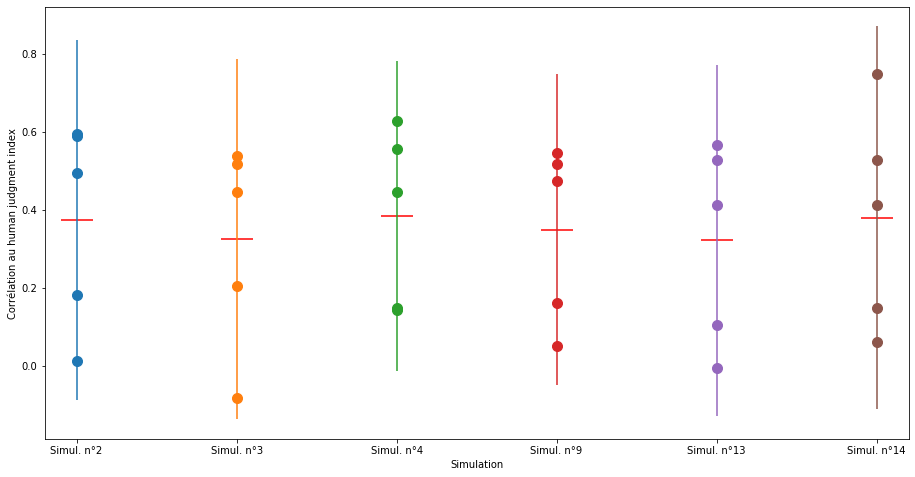

In [223]:
simul = [2,3,4,9,13,14]
intervalles_confiance(simul, "cos")

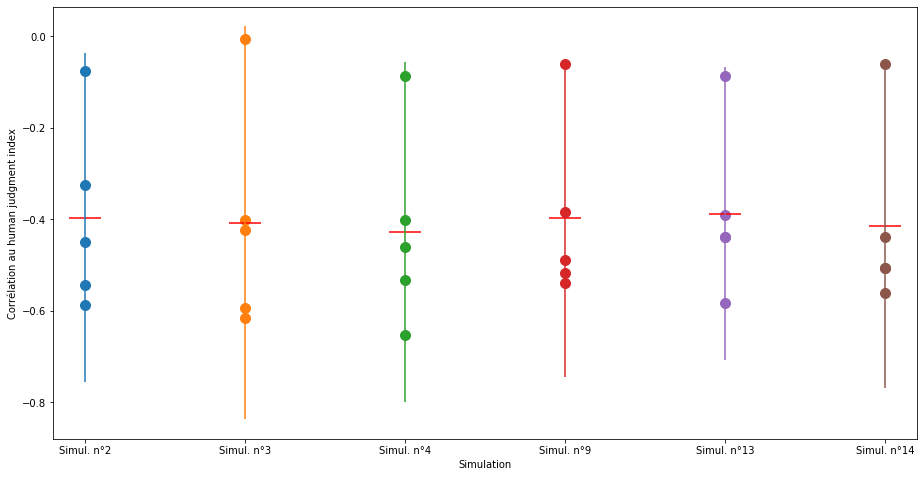

In [221]:
intervalles_confiance(simul, "eucl")

# 3. PCA

In [171]:
def ACP(liste, statique = True, nom_couples_explicite=True):
    # On enlève les mots qui n'existent pas
    liste_triee =[]
    for couple in liste:
        liste_triee.append([w for w in couple if w in mot_index]) 
    liste_mots = [w for couple in liste_triee for w in couple]

    df_res = pd.DataFrame.from_dict(mot_poids).transpose()
    df_res = df_res.loc[liste_mots]
    df_res['label'] = 'Autre' 

    if nom_couples_explicite:
        for couple in liste_triee:
            df_res.loc[couple,'label'] = '/'.join(couple)
    else:
        for i in range(0, len(liste_triee)):
            df_res.loc[liste_triee[i],'label'] = "Couple %i" %i        

    features = list(range(0, len(liste_triee)))
    # Separating out the features
    x = df_res.loc[:, features].values
    # Separating out the target
    y = df_res.loc[:,['label']].values
    # Standardizing the features
    x = StandardScaler().fit_transform(x)

    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents
                 , columns = ['Axe 1', 'Axe 2'])

    df_res['mot'] = df_res.index.values
    df_res = df_res.reset_index()

    finalDf = pd.concat([principalDf, df_res[['label','mot']]],  axis = 1)

    if statique:
        # Représentation simple statique 
        fig = plt.figure(figsize = (12,8))

        g = sns.scatterplot(x="Axe 1", y="Axe 2",
                        hue="label", data=finalDf, s = 150)
        handles, labels = g.get_legend_handles_labels()
        box = g.get_position()
        g.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position

        # Put a legend to the right side
        g.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1,
                 handles=handles[1:], labels=list(dict.fromkeys(finalDf["label"])))
    else:
        init_notebook_mode(connected=True)

        cf.go_offline()
        cf.set_config_file(offline=False, world_readable=True)

        #Travailler avec sous-table sinon trop lourd
        #subFinalDf = pd.concat([finalDf[(finalDf['label'] != "Autre")],finalDf.iloc[1:100:]],  axis = 0)
        subFinalDf = pd.concat([finalDf],  axis = 0)

        subFinalDf.iplot(kind='scatter',
                      mode='markers',
                      x='Axe 1',
                      y='Axe 2',
                      categories='label',
                      text='mot',
                      xTitle='Axe 1',
                      yTitle='Axe 2',
                      title='ACP en 2 composantes',
                      filename='cufflinks/simple-scatter')


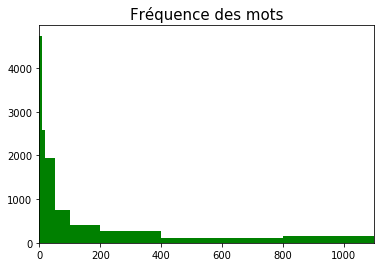

In [172]:
#def creer_liste_random(liste, statique = True, nom_couples_explicite=True):

import matplotlib.pyplot as plt
plt.hist(fdist.values(), bins=[0,10,20,50, 100, 200,400,800,max(fdist.values())],color='g') #width=100, range=(0, 50000)
plt.xlim(xmin=0, xmax = 1100)
plt.title('Fréquence des mots', fontsize=15)
plt.show()

In [173]:
np.random.seed(1)

mots0_20 = dict()
mots20_100 = dict()
mots100_1000 = dict()
mots1000_max = dict()

for (key, value) in fdist.items():
    if value <= 20 :
        mots0_20[key] = value
    if value > 20 and value <= 100 :
        mots20_100[key] = value
    if value > 100 and value <= 1000 :
        mots100_1000[key] = value        
    if value > 1000 :
        mots1000_max[key] = value


liste_0_20 = list(np.random.choice(list(mots0_20.keys()), size=100))
liste_20_100 = list(np.random.choice(list(mots20_100.keys()), size=100))
liste_100_1000 = list(np.random.choice(list(mots100_1000.keys()), size=100))
liste_1000_max = list(np.random.choice(list(mots1000_max.keys()), size=100))

liste2 = [liste_0_20, liste_20_100, liste_100_1000, liste_1000_max]

In [161]:
#liste = [["homme","femme", "enfant"],["chien","chat"],
#         ["vanille","chocolat"],
#    ["poli","courtois"],["bonjour","salut"],["propre","sale"],["canapé","fauteuil"],
#    ["téléphone","portable"],["voiture","camion"],["grand","petit"]]

#liste = [["homme", "tttttttttt","femme","sexe","genre","mari","épouse","famille","inégalités","enfant","amour","couple","différence"],
#    ["chien","chat","animal","domestique","maison","aboyer","miauler","labrador","poil","pattes","spa","ami"],
#    ["vanille","chocolat","parfum","goût","fraise","glace","boule","gâteau","bonbon","blanc","noir","préférence"],
#    ["poli","courtois","bonjour","merci","pardon","stp","règles","apprendre","savoir-vivre","savoir-être","formule","demander"],
#    ["choqué","horrifié","peur","terreur","phobie","clown","noir","araignée","rat","cri","oh","ah"],
#    ["propre","sale","nettoyer","vaisselle","laver","savon","produit","salissures","traces","net","éclatant","brillant"],
#    ["canapé","fauteuil","maison","salon","assis","confortable","sofa","convertible","cuir","télé","accoudoir","plaid"],
#    ["téléphone","portable","appel","allo","décrocher","sms","numéro","mobile","orange","sfr","free","bouygues"],
#    ["voiture","camion","moto","véhicule","conduire","rouler","conducteur","volant","chauffeur","permis","vitesse","passager"],
#    ["grand","petit","taille","géant","nain","s","m","l","xl","mesure","énorme","longueur"]
#]

liste1 = [["poli","courtois","bonjour","salut"],["canapé","fauteuil","table","chaise"],
    ["téléphone","portable","numéro","appel"],["voiture","camion","vélo","train"],
         ["beau","mignon","bg","mannequin"],["docteur","médecin","santé","bobo"],
         ["belle","jolie","mignonne","bellegosse"],["père","papa","daron"],
         ["mère","maman","daronne"],["ol","psg","foot","stade"]]

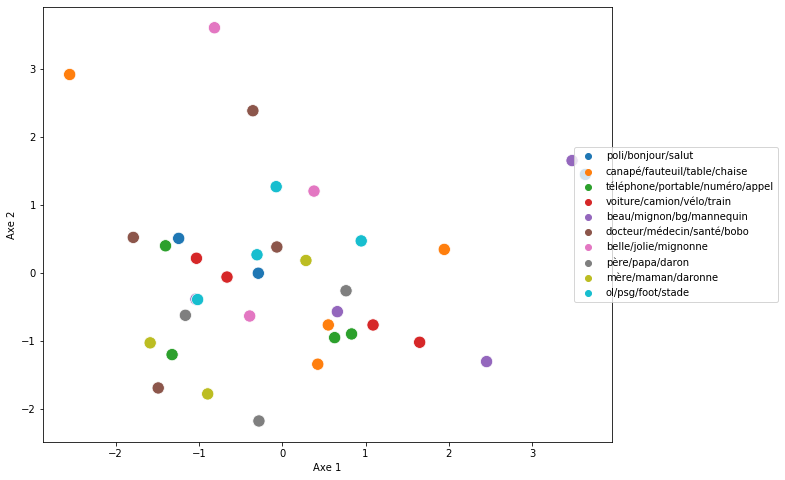

In [174]:
ACP(liste1, statique = True)

In [163]:
ACP(liste1, statique = False)

In [175]:
ACP(liste2, statique = False)

# 4. TSNE

In [178]:
def tsne_graph(liste, statique = True, nom_couples_explicite=True):
    liste_triee =[]
    for couple in liste:
        liste_triee.append([w for w in couple if w in mot_index])
    liste_mots = [w for couple in liste_triee for w in couple]
    df_res = pd.DataFrame.from_dict(mot_poids).transpose()
    df_res = df_res.loc[liste_mots]
    df_res['label'] = 'Autre' 

    if nom_couples_explicite:
        for couple in liste_triee:
            df_res.loc[couple,'label'] = '/'.join(couple)
    else:
        for i in range(0, len(liste_triee)):
            df_res.loc[liste_triee[i],'label'] = "Couple %i" %i  
    features = list(range(0, len(liste)))
    # Separating out the features
    data_x = df_res.loc[:, features].values
    # Separating out the target
    data_y = df_res.loc[:,['label']].values

    tsne = TSNE(n_components=2, random_state=0)
    tsne_obj= tsne.fit_transform(data_x)

    test_features = [[i+1]*len(liste_triee[i]) for i in range(0, len(liste_triee))]
    test_features = [i for f in test_features for i in f]
    tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                            'Y':tsne_obj[:,1],
                           'digit':test_features})
    tsne_df["legend"] = tsne_df["digit"]
    for i in range(0,len(tsne_df)):
        tsne_df["legend"][i]= "Couple %i" %tsne_df["digit"][i]
    if statique:
        fig = plt.figure(figsize = (12,8))
        g = sns.scatterplot(x="X", y="Y",
                            hue = "legend",
                            data=tsne_df);
        handles, labels = g.get_legend_handles_labels()
        box = g.get_position()
        g.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position

        # Put a legend to the right side
        g.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1,
                 handles=handles[1:], labels=list(dict.fromkeys(tsne_df["legend"])))
    else:
        tsne_df["mot"] = liste_mots
        cf.go_offline()
        cf.set_config_file(offline=False, world_readable=True)

        #Travailler avec sous-table sinon trop lourd
        subFinalDf = pd.concat([tsne_df],  axis = 0)

        subFinalDf.iplot(kind='scatter',
                      mode='markers',
                      x='X',
                      y='Y',
                      categories='legend',
                      text='mot',
                      xTitle='Axe 1',
                      yTitle='Axe 2',
                      title='TSNE',
                      filename='cufflinks/simple-scatter')
        

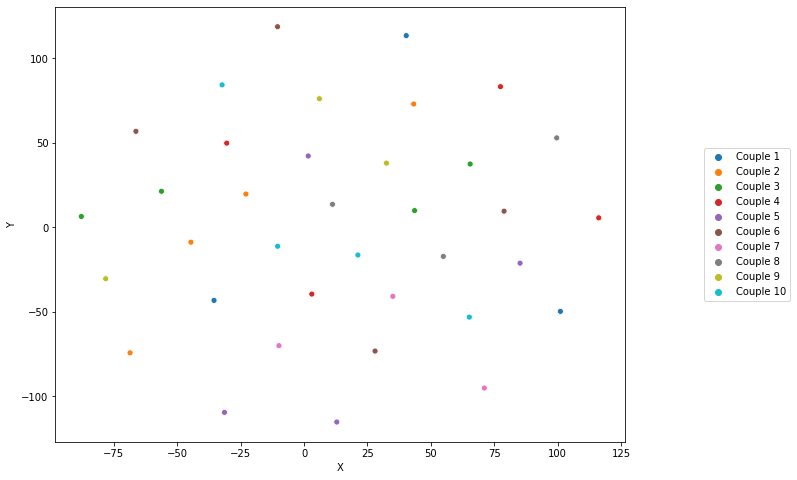

In [177]:
tsne_graph(liste1, statique = True,
           nom_couples_explicite = True) #Paramètre ne marche pas : a debuger ?

In [179]:
tsne_graph(liste1, statique = False,
           nom_couples_explicite = True) #Paramètre ne marche pas : a debuger ?

In [180]:
tsne_graph(liste2, statique = False,
           nom_couples_explicite = True)#Paramètre ne marche pas : a debuger ?